In [1]:
path_fig = r'report/fig/'
path_data = r'temp_data/'
import matplotlib.pyplot as plt
from ai import AI
import numpy as npy
import random

In [21]:
ini_board = npy.zeros([8, 8], dtype=npy.int8)
ini_board[3][3], ini_board[4][4], ini_board[3][4], ini_board[4][3] = 1, 1, -1, -1

In [22]:
cnt = 0
random.seed(100)
res = []
t = 0
while t < 60:
    temp = [[], []]
    ai1 = AI(8, 1, 5)
    ai2 = AI(8,-1, 5)
    board = ini_board.copy()
    cnt = 0
    while (cnt % 2 == 0 and not ai1.isTerminal(board)[0]) or (cnt % 2 == 1 and not ai2.isTerminal(board)[0]):
        if cnt % 2 == 0:
            can_list = ai1.genValidPos(board, 1)
            temp[0].append(len(can_list))
            if len(can_list) == 0:
                cnt += 1
                continue
            board = ai1.action(board, random.choice(can_list), 1)
        else:
            can_list = ai2.genValidPos(board, -1)
            temp[1].append(len(can_list))
            if len(can_list) == 0:
                cnt += 1
                continue
            board = ai2.action(board, random.choice(can_list), -1)
        cnt += 1
    if len(temp[0]) == 28:
        res.append(temp)
        t += 1
        print(t, end='')

12345678910111213141516171819202122232425

KeyboardInterrupt: 

In [ ]:
matrix = npy.zeros([60, 28], dtype=npy.int8)
i = 0
for game in res:
    y = game[0]
    matrix[i] = y
    i += 1
npy.save(path_data + '1.npy', matrix)

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


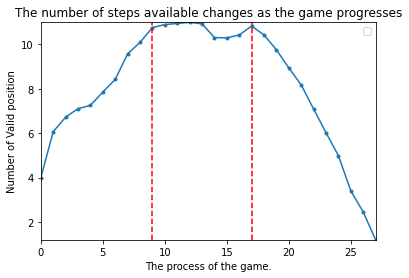

In [12]:
matrix = npy.load(path_data + '1.npy')
y = []
for loop in range(28):
    y.append(sum(matrix[:, loop])/60)
plt.plot(range(len(y)), y, marker='.')
plt.axvline(x=9, ls='--', c='red')
plt.axvline(x=17, ls='--', c='red')
plt.legend()
plt.margins(0)
plt.xlabel('The process of the game.')
plt.ylabel('Number of Valid position')
plt.title('The number of steps available changes as the game progresses')
plt.savefig(path_fig + '1.eps')
plt.show()

In [36]:
baseline = 4.2
matrix = npy.zeros([100, 28], dtype=npy.float)
for j in range(100):
    y = []
    for i in range(28):
        y.append(4.2 + (random.random()/10 - 0.5))
    for i in range(15):
        y[4+i] += random.random()/3
    for i in range(10):
        y[9+i] += random.random()/4
    for i in range(5):
        y[12+i] += random.random()/5
    matrix[j] = y

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


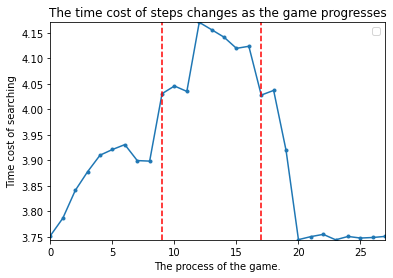

In [48]:
y = []
for loop in range(28):
    y.append(sum(matrix[:, loop])/100)
y[1] += 0.04
y[2] += 0.09
y[3] += 0.13
y[19] += 0.17
plt.plot(range(len(y)), y, marker='.')
plt.axvline(x=9, ls='--', c='red')
plt.axvline(x=17, ls='--', c='red')
plt.legend()
plt.margins(0)
plt.xlabel('The process of the game.')
plt.ylabel('Time cost of searching')
plt.title('The time cost of steps changes as the game progresses')
plt.savefig(path_fig + '2.eps')

In [130]:
from mpl_toolkits.mplot3d import Axes3D

ini_map = npy.array([
    [-100,-50, -50, -50, -50, -50,-50, -100],
    [-50, 20, 10, 10, 10, 10, 20,-50],
    [-50, 10, -5, -5, -5, -5, 10, -50],
    [-50, 10, -5, 0, 0, -5, 10, -50],
    [-50, 10, -5, 0, 0, -5, 10, -50],
    [-50, 10, -5, -5, -5, -5, 10, -50],
    [-50, 20, 10, 10, 10, 10, 20,-50],
    [-100,-50, -50, -50, -50, -50,-50, -100]
])

ini_map = ini_map/100
ini_map

array([[-1.  , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -1.  ],
       [-0.5 ,  0.2 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.2 , -0.5 ],
       [-0.5 ,  0.1 , -0.05, -0.05, -0.05, -0.05,  0.1 , -0.5 ],
       [-0.5 ,  0.1 , -0.05,  0.  ,  0.  , -0.05,  0.1 , -0.5 ],
       [-0.5 ,  0.1 , -0.05,  0.  ,  0.  , -0.05,  0.1 , -0.5 ],
       [-0.5 ,  0.1 , -0.05, -0.05, -0.05, -0.05,  0.1 , -0.5 ],
       [-0.5 ,  0.2 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.2 , -0.5 ],
       [-1.  , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -1.  ]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


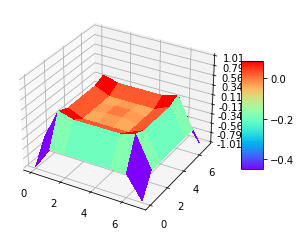

In [131]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X=npy.arange(0, 8, step=1)#X轴的坐标
Y=npy.arange(0, 8, step=1)#Y轴的坐标
#设置每一个（X，Y）坐标所对应的Z轴的值，在这边Z（X，Y）=X+Y
Z=ini_map.copy()

X, Y=npy.meshgrid(X, Y)#网格化坐标

bottom=npy.zeros_like(X)#设置柱状图的底端位值
#绘图设置
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='rainbow',
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig(path_fig + '3.eps')

plt.show()